# **Project Charter - Entendimiento del Negocio**
---

## **Datos**
---

### **Origen**
---

**DataSet:** [Kaggle](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset)

In [19]:
# URL donde se guardaron los datos de kaggle para facilitar su gestión
url = 'https://firebasestorage.googleapis.com/v0/b/personalwp-8822c.appspot.com/o/diabetes_prediction_dataset.csv?alt=media&token=4d70d154-c3d0-4fa0-a3aa-9b9972dd3b95'

### **Carga o Adquisición de Datos**
---

In [20]:
# Librerias
import os
import pandas as pd
import requests
import logging
import matplotlib.pyplot as plt

In [21]:
# Funcion para crear el objeto de creación de logs
def create_logger():
  logging.basicConfig(level = logging.INFO, format = '%(asctime)s - %(levenname)s - %(message)s')
  logger = logging.getLogger('Logger')
  logger.info('Logger creado')
  return logger

In [22]:
# Función de consumo a la base de datos de Firebase para cargar el DataSet
def download_firebase(url, logger):
  logger.info("Extrayendo el archivo desde Firebase")
  df = None
  try:
    df = pd.read_csv(url)
    logger.info("Archivo cargado")
  except requests.exceptions.RequestException as e:
    logger.info(f"Error al descargar el archivo CSV: {e}")
  except pd.errors.EmptyDataError:
    logger.info("El archivo CSV está vacío.")
  except Exception as e:
    logger.info(f"Ocurrió un error inesperado: {e}")
  return df

In [23]:
# Objeto para la creación de logs
logger = create_logger()

In [ ]:
# Cargar DataSet
df = download_firebase(url, logger)
print(f"Tamaño diabetes_prediction_dataset.csv: {df.shape}")
print(f"Columnas diabetes_prediction_dataset.csv: {df.columns}")

Tamaño Star_Classification.csv: (100000, 9)
Columnas Star_Classification.csv: Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


In [25]:
# Información del DataSet
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [26]:
# Cinco primeros registros
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


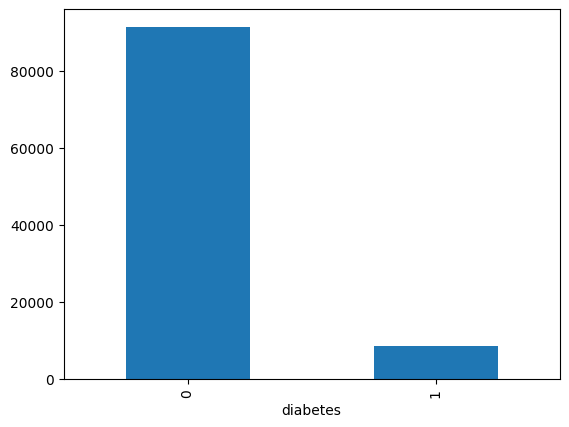

In [27]:
# Etiquetas
df['diabetes'].unique()
df['diabetes'].value_counts().plot(kind = 'bar')
plt.show()

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*